In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [200]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [201]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\과학기술정책연구원_과학기술혁신정책통계 홈페이지 통계데이터\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\과학기술정책연구원_과학기술혁신정책통계 홈페이지 통계데이터\\과힉기술정책연구원_과학기술혁신정책통계 홈페이지 통계데이터_20190920..csv']

In [202]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,제목,데이터출처,생성년도,데이터설명,키워드1,키워드2
0,국가연구개발사업에?대한?투자와?산출물?지표?비교,① 미래창조과학부?한국과학기술기획평가원 ② IMD ③ NTIS,① 2013 ② 2002~2013 ③ 2014,국가연구개발사업에 대한 투자와 산출물 지표 비교를 통해 국내 국가연구개발산업에 있어...,"국가연구개발사업 투자, 산출물 지표\r\n","논문인용건수, 과학경쟁력, 기술경쟁력, 첨단기술제품 비중, Input, Output..."
1,국가연구개발사업의 양적 · 질적 연구성과 추이,미래창조과학부,2014,국내 연구성과의 확산 및 질적 성과의 측면에서 취약성을 가지고 있음을 제시,양적 질적 연구성과 \r\n,"SCI 논문 수, 특허, 성과확산, PCT 출원 건수, 피인용 수, 글로벌 혁신지수..."
2,우리나라 기업의 주력산업군의 대일본 핵심부품 · 소재에 대한 의존도,박희재,2014,국가연구개발사업을 통한 연구성과의 창출이 실질적으로 국가경제에 어떠한 역할을 수행하...,"주력사업군, 일본, 핵심 부품, 핵심 소재, 의존도 \r\n","부품 수입, 소재 수입, 순위, 핵심부품소재 수입 품목"
3,연구개발에 있어 대학과 산업의 협력 정도,① World Economic Forum ② 박희재(재인용),① 2007-2013 ② 2014,"연구성과평가법이 연구성과 창출, 연구성과 활용 및 사업화에 미친 영향을 가늠해 볼 ...",NaN,NaN
4,2014년 특정평가 대상사업(안),국가과학기술심의회 운영위원회,2013,특정평가를 국가연구개발사업에 대한 심층평가 내지 정책평가로 전환하는 방안을 검토할 ...,특정평가 대상사업\r\n,"창업지원, 개별사업, 성과평가, C-Korea, 부처별 예산, 벤처 중소기업 해외진출"


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      2609 non-null   object
 1   데이터출처   2600 non-null   object
 2   생성년도    2599 non-null   object
 3   데이터설명   2602 non-null   object
 4   키워드1    2569 non-null   object
 5   키워드2    604 non-null    object
dtypes: object(6)
memory usage: 122.5+ KB


In [204]:
df.describe()

,제목,데이터출처,생성년도,데이터설명,키워드1,키워드2
count,2609,2600,2599,2602,2569,604
unique,2533,529,131,2425,2363,554
top,국가연구개발사업 참여하면서 자체 수행 별도 연구 여부,STEPI,2015,사회변화에 따른 지표 및 그래프,\r\n,"지역 간 비교, 지역별 비교"
freq,3,888,859,14,15,9


## 전처리

In [205]:
df.fillna('None',inplace=True)

In [206]:
def convert_where(x):
    if x=='None':
        return ['None']
    tmp_list = re.findall(r'([a-zA-Z가-힣 ]*)',x)
    result = []
    for t in tmp_list:
        if t=='재구성' or t=='재인용' or t=='':
            continue
        result.append(t.strip())
    return result
df['데이터출처'] = df['데이터출처'].apply(convert_where)

In [207]:
def convert_year(x):
    if x=='None' or x=='-':
        return ['None']
    tmp_list = re.findall(r'([0-9-^~]*)',x)
    result = set()
    for t in tmp_list:
        if t=='':
            continue
        if '~' in t or '-' in t:
            period = re.findall(r'([0-9]+)',t)
            period_list = [p for p in range(int(period[0]),int(period[1])+1)]
            for p in period_list:
                result.add(p)
        else:
            result.add(int(t))
    return list(result)
df['생성년도'] = df['생성년도'].apply(convert_year)

In [208]:
def convert_keyword(x):
    if x=='None':
        return ['None']
    tmp_list = re.findall(r'([a-zA-Z가-힣 ]*)',x)
    result = []
    for t in tmp_list:
        if t=='':
            continue
        word = t.strip()
        if 'R' in t or 'D' in t:
            word = 'R&D'
        result.append(word)
    return result
df['키워드1'] = df['키워드1'].apply(convert_keyword)
df['키워드2'] = df['키워드2'].apply(convert_keyword)

In [209]:
df.head()

,제목,데이터출처,생성년도,데이터설명,키워드1,키워드2
0,국가연구개발사업에?대한?투자와?산출물?지표?비교,"[미래창조과학부, 한국과학기술기획평가원, IMD, NTIS]","[2002, 2003, 2004, 2005, 2006, 2007, 2008, 200...",국가연구개발사업에 대한 투자와 산출물 지표 비교를 통해 국내 국가연구개발산업에 있어...,"[국가연구개발사업 투자, 산출물 지표]","[논문인용건수, 과학경쟁력, 기술경쟁력, 첨단기술제품 비중, Input, Outpu..."
1,국가연구개발사업의 양적 · 질적 연구성과 추이,[미래창조과학부],[2014],국내 연구성과의 확산 및 질적 성과의 측면에서 취약성을 가지고 있음을 제시,[양적 질적 연구성과],"[SCI 논문 수, 특허, 성과확산, PCT 출원 건수, 피인용 수, 글로벌 혁신지..."
2,우리나라 기업의 주력산업군의 대일본 핵심부품 · 소재에 대한 의존도,[박희재],[2014],국가연구개발사업을 통한 연구성과의 창출이 실질적으로 국가경제에 어떠한 역할을 수행하...,"[주력사업군, 일본, 핵심 부품, 핵심 소재, 의존도]","[부품 수입, 소재 수입, 순위, 핵심부품소재 수입 품목]"
3,연구개발에 있어 대학과 산업의 협력 정도,"[World Economic Forum, 박희재]","[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]","연구성과평가법이 연구성과 창출, 연구성과 활용 및 사업화에 미친 영향을 가늠해 볼 ...",[None],[None]
4,2014년 특정평가 대상사업(안),[국가과학기술심의회 운영위원회],[2013],특정평가를 국가연구개발사업에 대한 심층평가 내지 정책평가로 전환하는 방안을 검토할 ...,[특정평가 대상사업],"[창업지원, 개별사업, 성과평가, C, Korea, 부처별 예산, 벤처 중소기업 해..."


## 시각화

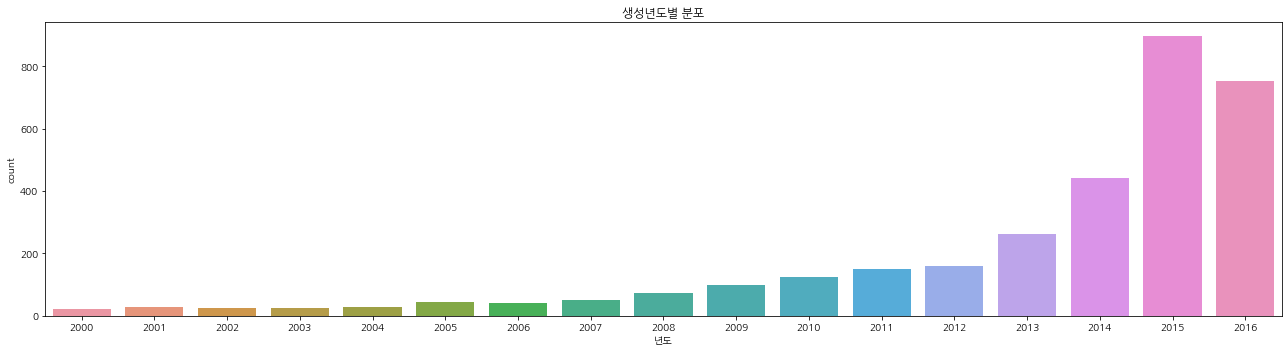

In [210]:
year_df = pd.DataFrame(columns=['년도','count'])
year_df['년도'] = [y for y in range(2000,2017)]
year_df['count'] = [0 for _ in range(2000,2017)]

def year_count(x):
    for y in x:
        if y=='None':
            break
        if y<2000 or y>2016:
            continue
        idx = year_df[year_df['년도']==y].index.values[0]
        year_df['count'].loc[idx] += 1

df['생성년도'].apply(year_count)

fig,axes = plt.subplots(1,1,figsize=(18,5))
sns.barplot(data=year_df,x='년도',y='count',ax=axes).set(title='생성년도별 분포')
plt.tight_layout()

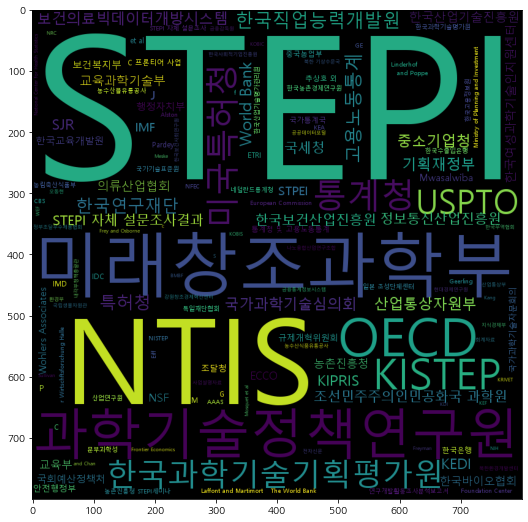

In [217]:
def keyword_dict(x):
    for k in x:
        if k=='None':
            continue
        if k not in c:
            c[k] = 1
        else:
            c[k] += 1
c = dict()
df['데이터출처'].apply(keyword_dict)
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)

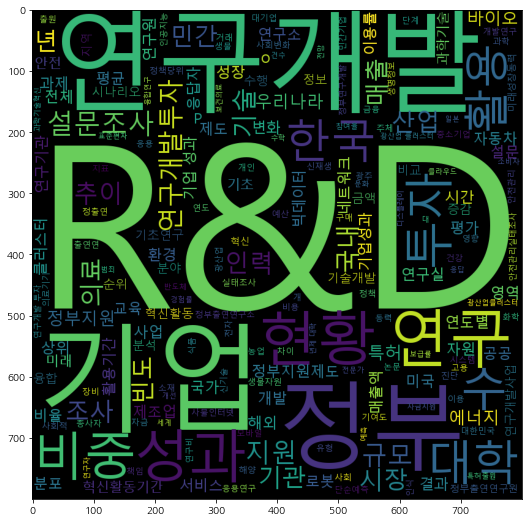

In [218]:
c = dict()
df['키워드1'].apply(keyword_dict)
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)

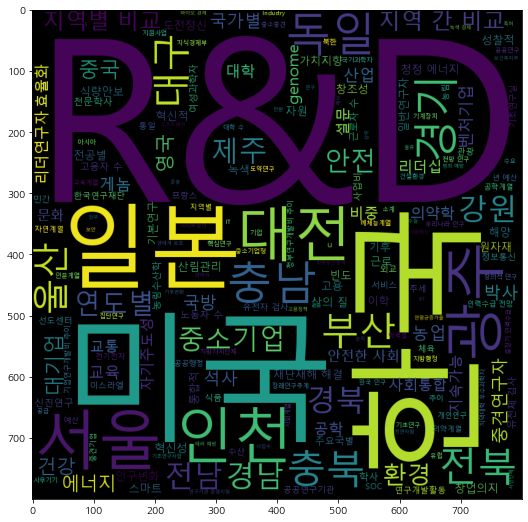

In [219]:
c = dict()
df['키워드2'].apply(keyword_dict)
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(9,9))
plt.imshow(gen)